## Working with missing data

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Values considered missing

In [19]:
df = pd.DataFrame(np.random.randn(5, 3), index=list('acefh'), 
                  columns=['one', 'two', 'three'])

In [20]:
df

,one,two,three
a,0.991331,0.835035,-0.687385
c,2.429685,0.181352,0.449114
e,-2.016648,0.701660,0.313612
f,-0.987902,-1.376635,-0.206406
h,-0.286410,1.196199,0.198393


In [21]:
df['four'] = 'bar'

In [22]:
df['five'] = df['one'] > 0

In [23]:
df

,one,two,three,four,five
a,0.991331,0.835035,-0.687385,bar,True
c,2.429685,0.181352,0.449114,bar,True
e,-2.016648,0.701660,0.313612,bar,False
f,-0.987902,-1.376635,-0.206406,bar,False
h,-0.286410,1.196199,0.198393,bar,False


In [24]:
df2 = df.reindex(list('abcdefgh'))

In [25]:
df2

,one,two,three,four,five
a,0.991331,0.835035,-0.687385,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,2.429685,0.181352,0.449114,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,-2.016648,0.701660,0.313612,bar,False
f,-0.987902,-1.376635,-0.206406,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,-0.286410,1.196199,0.198393,bar,False


In [26]:
df2['one']

a    0.991331
b         NaN
c    2.429685
d         NaN
e   -2.016648
f   -0.987902
g         NaN
h   -0.286410
Name: one, dtype: float64

Two ways to detect missing values: isna() and notna()

In [27]:
df2['one'].isna()

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [28]:
df2.isna()

,one,two,three,four,five
a,False,False,False,False,False
b,True,True,True,True,True
c,False,False,False,False,False
d,True,True,True,True,True
e,False,False,False,False,False
f,False,False,False,False,False
g,True,True,True,True,True
h,False,False,False,False,False


In [32]:
df2.notna()

,one,two,three,four,five
a,True,True,True,True,True
b,False,False,False,False,False
c,True,True,True,True,True
d,False,False,False,False,False
e,True,True,True,True,True
f,True,True,True,True,True
g,False,False,False,False,False
h,True,True,True,True,True


#### Integer dtypes and missing data

In [33]:
pd.Series([1, 2, np.nan, 4])

0    1.0
1    2.0
2    NaN
3    4.0
dtype: float64

In [35]:
pd.Series([1, 2, np.nan, 4], dtype=pd.Int64Dtype())

0       1
1       2
2    <NA>
3       4
dtype: Int64

#### Datetimes

In [36]:
df2 = df.copy()

In [37]:
df2

,one,two,three,four,five
a,0.991331,0.835035,-0.687385,bar,True
c,2.429685,0.181352,0.449114,bar,True
e,-2.016648,0.701660,0.313612,bar,False
f,-0.987902,-1.376635,-0.206406,bar,False
h,-0.286410,1.196199,0.198393,bar,False


In [38]:
df2['timestamp'] = pd.Timestamp('20200807')

In [39]:
df2

,one,two,three,four,five,timestamp
a,0.991331,0.835035,-0.687385,bar,True,2020-08-07
c,2.429685,0.181352,0.449114,bar,True,2020-08-07
e,-2.016648,0.701660,0.313612,bar,False,2020-08-07
f,-0.987902,-1.376635,-0.206406,bar,False,2020-08-07
h,-0.286410,1.196199,0.198393,bar,False,2020-08-07


In [41]:
df2.loc[['a', 'c', 'h'], ['one', 'timestamp']] = np.nan

In [42]:
df2

,one,two,three,four,five,timestamp
a,NaN,0.835035,-0.687385,bar,True,NaT
c,NaN,0.181352,0.449114,bar,True,NaT
e,-2.016648,0.701660,0.313612,bar,False,2020-08-07
f,-0.987902,-1.376635,-0.206406,bar,False,2020-08-07
h,NaN,1.196199,0.198393,bar,False,NaT


In [43]:
df2.dtypes

one                 float64
two                 float64
three               float64
four                 object
five                   bool
timestamp    datetime64[ns]
dtype: object

### Inserting missing data

In [44]:
s = pd.Series([1, 2, 3])

In [45]:
s.loc[0] = None

In [46]:
s

0    NaN
1    2.0
2    3.0
dtype: float64

In [47]:
s = pd.Series([pd.Timestamp('20200807'), pd.Timestamp('20200808'), pd.Timestamp('20200809')])

In [48]:
s

0   2020-08-07
1   2020-08-08
2   2020-08-09
dtype: datetime64[ns]

In [49]:
s.loc[0] = None

In [50]:
s

0          NaT
1   2020-08-08
2   2020-08-09
dtype: datetime64[ns]

### Calculations with missing data

In [52]:
df2 = df.reindex(list('abcdefgh'))

In [53]:
df2

,one,two,three,four,five
a,0.991331,0.835035,-0.687385,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,2.429685,0.181352,0.449114,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,-2.016648,0.701660,0.313612,bar,False
f,-0.987902,-1.376635,-0.206406,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,-0.286410,1.196199,0.198393,bar,False


In [59]:
a = df2.loc[['a', 'b', 'e', 'g', 'h'], ['one', 'two']]

In [60]:
a

,one,two
a,0.991331,0.835035
b,NaN,NaN
e,-2.016648,0.701660
g,NaN,NaN
h,-0.286410,1.196199


In [61]:
b = df2.loc[['a', 'b', 'e', 'g', 'h'], ['one', 'two', 'three']]

In [62]:
b

,one,two,three
a,0.991331,0.835035,-0.687385
b,NaN,NaN,NaN
e,-2.016648,0.701660,0.313612
g,NaN,NaN,NaN
h,-0.286410,1.196199,0.198393


In [63]:
a + b

,one,three,two
a,1.982661,NaN,1.670070
b,NaN,NaN,NaN
e,-4.033296,NaN,1.403320
g,NaN,NaN,NaN
h,-0.572820,NaN,2.392399


In [65]:
df2

,one,two,three,four,five
a,0.991331,0.835035,-0.687385,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,2.429685,0.181352,0.449114,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,-2.016648,0.701660,0.313612,bar,False
f,-0.987902,-1.376635,-0.206406,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,-0.286410,1.196199,0.198393,bar,False


In [66]:
df2['one'].sum()

0.1300553889021674

In [67]:
df2['one'].cumsum()

a    0.991331
b         NaN
c    3.421015
d         NaN
e    1.404367
f    0.416466
g         NaN
h    0.130055
Name: one, dtype: float64

In [70]:
df2['one'].cumsum()

a    0.991331
b         NaN
c    3.421015
d         NaN
e    1.404367
f    0.416466
g         NaN
h    0.130055
Name: one, dtype: float64

In [73]:
df2.mean(1)

a    0.379660
b         NaN
c    1.020050
d         NaN
e   -0.333792
f   -0.856981
g         NaN
h    0.369394
dtype: float64

In [74]:
df2.mean(0)

one      0.026011
two      0.307522
three    0.013466
five     0.400000
dtype: float64

### Sum/prod of empties/nans

In [77]:
pd.Series([np.nan] * 5)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
dtype: float64

In [78]:
pd.Series([np.nan] * 5).sum()

0.0

In [82]:
pd.Series([], dtype='float64').sum()

0.0

In [83]:
pd.Series([np.nan] * 5).prod()

1.0

In [84]:
pd.Series([], dtype='float64').prod()

1.0

### NA values in GroupBy

In [85]:
df2

,one,two,three,four,five
a,0.991331,0.835035,-0.687385,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,2.429685,0.181352,0.449114,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,-2.016648,0.701660,0.313612,bar,False
f,-0.987902,-1.376635,-0.206406,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,-0.286410,1.196199,0.198393,bar,False


In [91]:
df2.groupby('one').mean()

,two,three
one,,
-2.016648,0.701660,0.313612
-0.987902,-1.376635,-0.206406
-0.286410,1.196199,0.198393
0.991331,0.835035,-0.687385
2.429685,0.181352,0.449114


### Filling missing values: fillna

#### Replace NA with a scalar value

In [92]:
df2

,one,two,three,four,five
a,0.991331,0.835035,-0.687385,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,2.429685,0.181352,0.449114,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,-2.016648,0.701660,0.313612,bar,False
f,-0.987902,-1.376635,-0.206406,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,-0.286410,1.196199,0.198393,bar,False


In [93]:
df2.fillna(0)

,one,two,three,four,five
a,0.991331,0.835035,-0.687385,bar,True
b,0.000000,0.000000,0.000000,0,0
c,2.429685,0.181352,0.449114,bar,True
d,0.000000,0.000000,0.000000,0,0
e,-2.016648,0.701660,0.313612,bar,False
f,-0.987902,-1.376635,-0.206406,bar,False
g,0.000000,0.000000,0.000000,0,0
h,-0.286410,1.196199,0.198393,bar,False


In [94]:
df2.fillna('missing')

,one,two,three,four,five
a,0.991331,0.835035,-0.687385,bar,True
b,missing,missing,missing,missing,missing
c,2.42968,0.181352,0.449114,bar,True
d,missing,missing,missing,missing,missing
e,-2.01665,0.70166,0.313612,bar,False
f,-0.987902,-1.37663,-0.206406,bar,False
g,missing,missing,missing,missing,missing
h,-0.28641,1.1962,0.198393,bar,False


#### Fill gaps forward or backward

In [95]:
df2

,one,two,three,four,five
a,0.991331,0.835035,-0.687385,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,2.429685,0.181352,0.449114,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,-2.016648,0.701660,0.313612,bar,False
f,-0.987902,-1.376635,-0.206406,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,-0.286410,1.196199,0.198393,bar,False


In [97]:
df2.fillna(method='pad')

,one,two,three,four,five
a,0.991331,0.835035,-0.687385,bar,True
b,0.991331,0.835035,-0.687385,bar,True
c,2.429685,0.181352,0.449114,bar,True
d,2.429685,0.181352,0.449114,bar,True
e,-2.016648,0.701660,0.313612,bar,False
f,-0.987902,-1.376635,-0.206406,bar,False
g,-0.987902,-1.376635,-0.206406,bar,False
h,-0.286410,1.196199,0.198393,bar,False


#### Limit the amount of filling

In [98]:
df2

,one,two,three,four,five
a,0.991331,0.835035,-0.687385,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,2.429685,0.181352,0.449114,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,-2.016648,0.701660,0.313612,bar,False
f,-0.987902,-1.376635,-0.206406,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,-0.286410,1.196199,0.198393,bar,False


In [99]:
df2.fillna(method='pad', limit=1)

,one,two,three,four,five
a,0.991331,0.835035,-0.687385,bar,True
b,0.991331,0.835035,-0.687385,bar,True
c,2.429685,0.181352,0.449114,bar,True
d,2.429685,0.181352,0.449114,bar,True
e,-2.016648,0.701660,0.313612,bar,False
f,-0.987902,-1.376635,-0.206406,bar,False
g,-0.987902,-1.376635,-0.206406,bar,False
h,-0.286410,1.196199,0.198393,bar,False


### Filling with a Pandas Object

In [100]:
dff = pd.DataFrame(np.random.randn(10, 3), columns=list('ABC'))

In [101]:
dff

,A,B,C
0,-0.228671,-1.560992,0.188663
1,-0.484927,0.484468,-1.202346
2,-0.684716,2.934087,-0.381902
3,-0.721041,0.343737,-0.461677
4,1.463523,-0.641367,-1.336695
5,0.158866,1.096729,1.184889
6,-0.005435,-0.374182,0.798162
7,-0.658726,-1.284555,0.762068
8,-0.800827,-0.344060,-1.272248
9,1.873991,-0.423389,-0.089447


In [102]:
dff.iloc[3:5, 0] = np.nan
dff.iloc[4:6, 1] = np.nan
dff.iloc[5:8, 2] = np.nan

In [103]:
dff

,A,B,C
0,-0.228671,-1.560992,0.188663
1,-0.484927,0.484468,-1.202346
2,-0.684716,2.934087,-0.381902
3,NaN,0.343737,-0.461677
4,NaN,NaN,-1.336695
5,0.158866,NaN,NaN
6,-0.005435,-0.374182,NaN
7,-0.658726,-1.284555,NaN
8,-0.800827,-0.344060,-1.272248
9,1.873991,-0.423389,-0.089447


In [105]:
dff.fillna(dff.mean())

,A,B,C
0,-0.228671,-1.560992,0.188663
1,-0.484927,0.484468,-1.202346
2,-0.684716,2.934087,-0.381902
3,-0.103806,0.343737,-0.461677
4,-0.103806,-0.028111,-1.336695
5,0.158866,-0.028111,-0.650808
6,-0.005435,-0.374182,-0.650808
7,-0.658726,-1.284555,-0.650808
8,-0.800827,-0.344060,-1.272248
9,1.873991,-0.423389,-0.089447


In [106]:
dff.mean()

A   -0.103806
B   -0.028111
C   -0.650808
dtype: float64

In [107]:
dff.mean()['B':'C']

B   -0.028111
C   -0.650808
dtype: float64

In [108]:
dff.fillna(dff.mean()['B':'C'])

,A,B,C
0,-0.228671,-1.560992,0.188663
1,-0.484927,0.484468,-1.202346
2,-0.684716,2.934087,-0.381902
3,NaN,0.343737,-0.461677
4,NaN,-0.028111,-1.336695
5,0.158866,-0.028111,-0.650808
6,-0.005435,-0.374182,-0.650808
7,-0.658726,-1.284555,-0.650808
8,-0.800827,-0.344060,-1.272248
9,1.873991,-0.423389,-0.089447


In [112]:
dff.where(pd.notna(dff), dff.mean(), axis=1)

,A,B,C
0,-0.228671,-1.560992,0.188663
1,-0.484927,0.484468,-1.202346
2,-0.684716,2.934087,-0.381902
3,-0.103806,0.343737,-0.461677
4,-0.103806,-0.028111,-1.336695
5,0.158866,-0.028111,-0.650808
6,-0.005435,-0.374182,-0.650808
7,-0.658726,-1.284555,-0.650808
8,-0.800827,-0.344060,-1.272248
9,1.873991,-0.423389,-0.089447


### Dropping axis labels with missing data: dropna

In [113]:
df2

,one,two,three,four,five
a,0.991331,0.835035,-0.687385,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,2.429685,0.181352,0.449114,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,-2.016648,0.701660,0.313612,bar,False
f,-0.987902,-1.376635,-0.206406,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,-0.286410,1.196199,0.198393,bar,False


In [117]:
df2['six'] = 'foobar'

In [118]:
df2.dropna()

,one,two,three,four,five,six
a,0.991331,0.835035,-0.687385,bar,True,foobar
c,2.429685,0.181352,0.449114,bar,True,foobar
e,-2.016648,0.701660,0.313612,bar,False,foobar
f,-0.987902,-1.376635,-0.206406,bar,False,foobar
h,-0.286410,1.196199,0.198393,bar,False,foobar


In [119]:
df2.dropna(axis=1)

,six
a,foobar
b,foobar
c,foobar
d,foobar
e,foobar
f,foobar
g,foobar
h,foobar


In [120]:
df2['one'].dropna()

a    0.991331
c    2.429685
e   -2.016648
f   -0.987902
h   -0.286410
Name: one, dtype: float64

### Interpolation

In [152]:
dates = pd.date_range('2010-01-01', periods=100, freq='BM')

In [153]:
ts = pd.Series(np.random.randn(100), index=dates)

In [154]:
ts

2010-01-29    0.381632
2010-02-26    1.054770
2010-03-31   -0.278355
2010-04-30    0.172278
2010-05-31    1.240017
                ...   
2017-12-29   -0.486752
2018-01-31    1.941507
2018-02-28    1.127090
2018-03-30   -0.295786
2018-04-30   -0.039192
Freq: BM, Length: 100, dtype: float64

In [155]:
ts.iloc[10:15] = np.nan
ts.iloc[49:59] = np.nan
ts.iloc[70:78] = np.nan

In [156]:
ts.count()

77

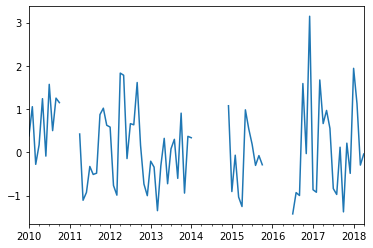

In [157]:
ts.plot()

In [158]:
ts.interpolate()

2010-01-29    0.381632
2010-02-26    1.054770
2010-03-31   -0.278355
2010-04-30    0.172278
2010-05-31    1.240017
                ...   
2017-12-29   -0.486752
2018-01-31    1.941507
2018-02-28    1.127090
2018-03-30   -0.295786
2018-04-30   -0.039192
Freq: BM, Length: 100, dtype: float64

In [159]:
ts.interpolate().count()

100

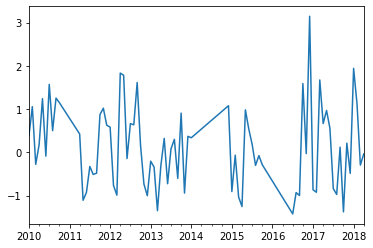

In [160]:
ts.interpolate().plot()

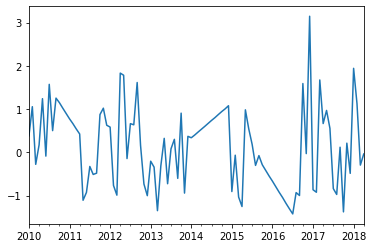

In [162]:
ts.interpolate(method='time').plot()

In [163]:
df = pd.DataFrame({'A': [1, 2.1, np.nan, 4.7, 5.6, 6.8],
                   'B': [.25, np.nan, np.nan, 4, 12.2, 14.4]})

In [164]:
df

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [165]:
df.interpolate()

,A,B
0,1.0,0.25
1,2.1,1.50
2,3.4,2.75
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


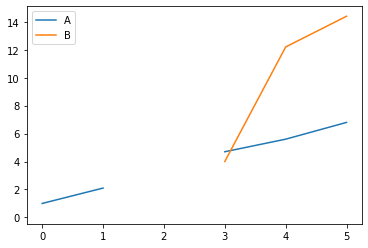

In [166]:
df.plot()

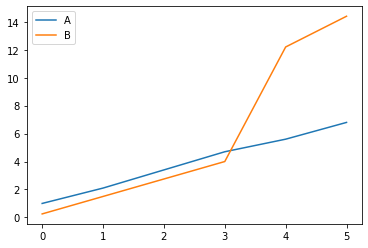

In [167]:
df.interpolate().plot()

In [168]:
df2

,one,two,three,four,five,six
a,0.991331,0.835035,-0.687385,bar,True,foobar
b,NaN,NaN,NaN,NaN,NaN,foobar
c,2.429685,0.181352,0.449114,bar,True,foobar
d,NaN,NaN,NaN,NaN,NaN,foobar
e,-2.016648,0.701660,0.313612,bar,False,foobar
f,-0.987902,-1.376635,-0.206406,bar,False,foobar
g,NaN,NaN,NaN,NaN,NaN,foobar
h,-0.286410,1.196199,0.198393,bar,False,foobar


In [169]:
df3 = df2.loc[:, 'one':'three']

In [170]:
df3

,one,two,three
a,0.991331,0.835035,-0.687385
b,NaN,NaN,NaN
c,2.429685,0.181352,0.449114
d,NaN,NaN,NaN
e,-2.016648,0.701660,0.313612
f,-0.987902,-1.376635,-0.206406
g,NaN,NaN,NaN
h,-0.286410,1.196199,0.198393


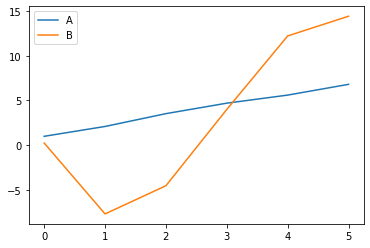

In [171]:
df.interpolate(method='barycentric').plot()

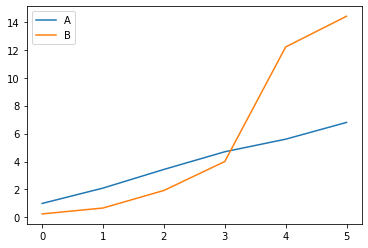

In [172]:
df.interpolate(method='pchip').plot()

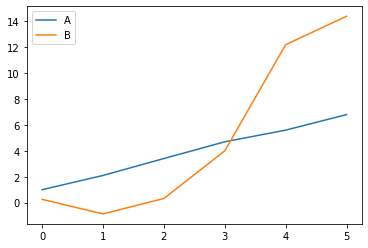

In [173]:
df.interpolate(method='akima').plot()

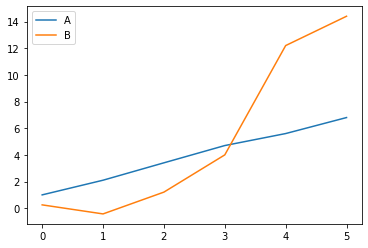

In [174]:
df.interpolate(method='spline', order=2).plot()

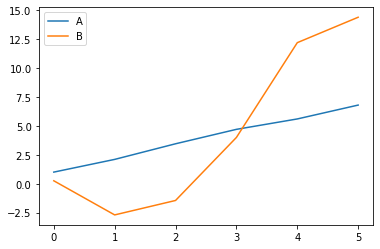

In [176]:
df.interpolate(method='polynomial', order=2).plot()

In [177]:
np.random.seed(100393)
s = pd.Series(np.arange(1, 10.1, .25) ** 2 + np.random.randn(37))

In [178]:
s

0      1.206603
1      1.534255
2      2.858627
3      3.448646
4      5.158003
5      3.980824
6      6.276929
7      7.274034
8      8.698316
9     10.927437
10    11.214913
11    14.030998
12    17.706765
13    17.937097
14    19.733130
15    22.779542
16    23.598194
17    27.115019
18    31.207285
19    34.503660
20    36.551626
21    38.505051
22    40.899017
23    46.447100
24    50.204845
25    53.285696
26    56.239092
27    58.740026
28    63.254369
29    67.424387
30    72.433676
31    78.363256
32    80.299677
33    86.432460
34    90.830362
35    93.972654
36    98.691082
dtype: float64

In [179]:
missing = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])

In [180]:
missing

array([ 4, 13, 14, 15, 16, 17, 18, 20, 29])

In [182]:
s[missing] = np.nan

In [183]:
s

0      1.206603
1      1.534255
2      2.858627
3      3.448646
4           NaN
5      3.980824
6      6.276929
7      7.274034
8      8.698316
9     10.927437
10    11.214913
11    14.030998
12    17.706765
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19    34.503660
20          NaN
21    38.505051
22    40.899017
23    46.447100
24    50.204845
25    53.285696
26    56.239092
27    58.740026
28    63.254369
29          NaN
30    72.433676
31    78.363256
32    80.299677
33    86.432460
34    90.830362
35    93.972654
36    98.691082
dtype: float64

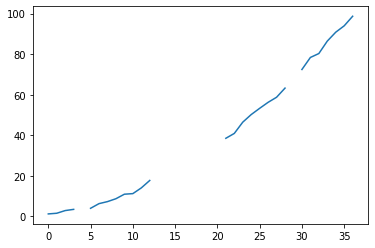

In [184]:
s.plot()

In [185]:
methods = ['linear', 'quadratic', 'cubic']
df = pd.DataFrame({m: s.interpolate(method=m) for m in methods})

In [186]:
df

,linear,quadratic,cubic
0,1.206603,1.206603,1.206603
1,1.534255,1.534255,1.534255
2,2.858627,2.858627,2.858627
3,3.448646,3.448646,3.448646
4,3.714735,3.329603,3.271527
5,3.980824,3.980824,3.980824
6,6.276929,6.276929,6.276929
7,7.274034,7.274034,7.274034
8,8.698316,8.698316,8.698316
9,10.927437,10.927437,10.927437


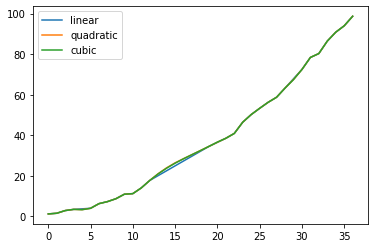

In [187]:
df.plot()

In [188]:
ser = pd.Series(np.sort(np.random.uniform(size=100)))

In [189]:
ser

0     0.001523
1     0.009227
2     0.023445
3     0.025560
4     0.030640
        ...   
95    0.922553
96    0.935738
97    0.946593
98    0.952027
99    0.957164
Length: 100, dtype: float64

In [192]:
pd.Index([49.25, 49.5, 49.75, 50.25, 50.5, 50.75])

Float64Index([49.25, 49.5, 49.75, 50.25, 50.5, 50.75], dtype='float64')

In [193]:
new_index = ser.index | pd.Index([49.25, 49.5, 49.75, 50.25, 50.5, 50.75])

In [194]:
new_index

Float64Index([ 0.0,  1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0,
              ...
              90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0],
             dtype='float64', length=106)

In [195]:
interp_s = ser.reindex(new_index)

In [196]:
interp_s

0.0     0.001523
1.0     0.009227
2.0     0.023445
3.0     0.025560
4.0     0.030640
          ...   
95.0    0.922553
96.0    0.935738
97.0    0.946593
98.0    0.952027
99.0    0.957164
Length: 106, dtype: float64

In [197]:
interp_s[interp_s.isna()]

49.25   NaN
49.50   NaN
49.75   NaN
50.25   NaN
50.50   NaN
50.75   NaN
dtype: float64

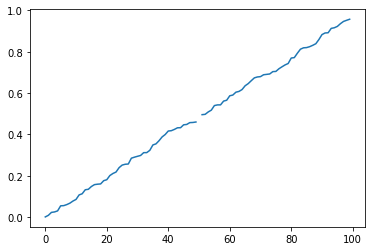

In [198]:
interp_s.plot()

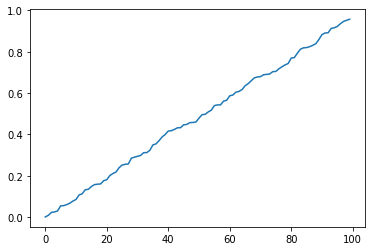

In [199]:
interp_s.interpolate().plot()

In [204]:
pd.concat([ser, interp_s], axis=1, keys=['raw', 'interpolated'])

,raw,interpolated
0.0,0.001523,0.001523
1.0,0.009227,0.009227
2.0,0.023445,0.023445
3.0,0.025560,0.025560
4.0,0.030640,0.030640
...,...,...
95.0,0.922553,0.922553
96.0,0.935738,0.935738
97.0,0.946593,0.946593
98.0,0.952027,0.952027


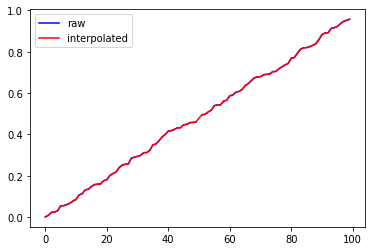

In [209]:
pd.concat([interp_s, interp_s.interpolate()], axis=1, keys=['raw', 'interpolated']).plot(color=
                                                                                   ['blue', 'red'])

#### Interpolation limits

In [221]:
ser = pd.Series([np.nan] * 9)
ser.iloc[[2, 6]] = [5.0, 13.0]

In [222]:
ser

0     NaN
1     NaN
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7     NaN
8     NaN
dtype: float64

In [223]:
ser.interpolate()

0     NaN
1     NaN
2     5.0
3     7.0
4     9.0
5    11.0
6    13.0
7    13.0
8    13.0
dtype: float64

In [224]:
ser.interpolate(limit=1)

0     NaN
1     NaN
2     5.0
3     7.0
4     NaN
5     NaN
6    13.0
7    13.0
8     NaN
dtype: float64

In [225]:
ser.interpolate(limit=2)

0     NaN
1     NaN
2     5.0
3     7.0
4     9.0
5     NaN
6    13.0
7    13.0
8    13.0
dtype: float64

In [226]:
ser.interpolate(limit=1, limit_direction='backward')

0     NaN
1     5.0
2     5.0
3     NaN
4     NaN
5    11.0
6    13.0
7     NaN
8     NaN
dtype: float64

In [227]:
ser.interpolate(limit=1, limit_direction='both')

0     NaN
1     5.0
2     5.0
3     7.0
4     NaN
5    11.0
6    13.0
7    13.0
8     NaN
dtype: float64

### Replacing generic values

In [229]:
s = pd.Series(np.random.randint(1, 10, 20))

In [230]:
s

0     4
1     6
2     5
3     6
4     2
5     7
6     4
7     2
8     3
9     6
10    5
11    3
12    5
13    4
14    8
15    6
16    5
17    7
18    1
19    8
dtype: int32

In [236]:
s.value_counts(ascending=True)

1    1
2    2
3    2
7    2
8    2
4    3
5    4
6    4
dtype: int64

In [238]:
s2 = s.replace(6, np.nan)

In [241]:
pd.concat([s, s2], axis=1, keys=['before', 'after'])

,before,after
0,4,4.0
1,6,NaN
2,5,5.0
3,6,NaN
4,2,2.0
5,7,7.0
6,4,4.0
7,2,2.0
8,3,3.0
9,6,NaN


In [246]:
s.replace({1:5, 6:10})

0      4
1     10
2      5
3     10
4      2
5      7
6      4
7      2
8      3
9     10
10     5
11     3
12     5
13     4
14     8
15    10
16     5
17     7
18     5
19     8
dtype: int64

In [247]:
df2

,one,two,three,four,five,six
a,0.991331,0.835035,-0.687385,bar,True,foobar
b,NaN,NaN,NaN,NaN,NaN,foobar
c,2.429685,0.181352,0.449114,bar,True,foobar
d,NaN,NaN,NaN,NaN,NaN,foobar
e,-2.016648,0.701660,0.313612,bar,False,foobar
f,-0.987902,-1.376635,-0.206406,bar,False,foobar
g,NaN,NaN,NaN,NaN,NaN,foobar
h,-0.286410,1.196199,0.198393,bar,False,foobar


In [253]:
df2.loc[:, 'one':'three'].replace(np.nan, 0.0)

,one,two,three
a,0.991331,0.835035,-0.687385
b,0.000000,0.000000,0.000000
c,2.429685,0.181352,0.449114
d,0.000000,0.000000,0.000000
e,-2.016648,0.701660,0.313612
f,-0.987902,-1.376635,-0.206406
g,0.000000,0.000000,0.000000
h,-0.286410,1.196199,0.198393


### String/regular expression replacement

In [254]:
d = {'a': list(range(4)), 'b': list('ab..'), 'c': ['a', 'b', np.nan, 'd']}

In [255]:
df = pd.DataFrame(d)

In [256]:
df

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,.,d


In [257]:
df.replace('.', np.nan)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [259]:
df.replace(list('abd.'), np.nan)

,a,b,c
0,0,NaN,NaN
1,1,NaN,NaN
2,2,NaN,NaN
3,3,NaN,NaN


### Numeric replacement

In [260]:
df = pd.DataFrame(np.random.randn(10, 2))

In [261]:
df

,0,1
0,0.014028,0.544310
1,0.509897,-0.953534
2,-0.252943,-0.989868
3,0.632802,0.111213
4,-0.022348,-0.167213
5,-0.368537,1.416135
6,0.379882,0.231878
7,0.020986,-0.324025
8,0.226309,1.425284
9,1.609406,-0.625214


In [263]:
df.shape

(10, 2)

In [265]:
df[np.random.rand(df.shape[0]) > 0.5] = 1.5

In [267]:
df.replace(1.5, np.nan)

,0,1
0,0.014028,0.544310
1,NaN,NaN
2,NaN,NaN
3,0.632802,0.111213
4,NaN,NaN
5,NaN,NaN
6,0.379882,0.231878
7,NaN,NaN
8,0.226309,1.425284
9,1.609406,-0.625214


In [269]:
df[np.random.rand(df.shape[0]) < 0.5] = 5.1

In [273]:
df.replace([1.5, 5.1], [np.nan, 'foobar'])

,0,1
0,0.0140279,0.54431
1,NaN,NaN
2,NaN,NaN
3,0.632802,0.111213
4,foobar,foobar
5,NaN,NaN
6,0.379882,0.231878
7,NaN,NaN
8,foobar,foobar
9,foobar,foobar


#### Missing data casting rules and indexing

In [276]:
s = pd.Series(np.random.randn(5), index=[0, 2, 4, 6, 7])

In [277]:
s > 0

0    False
2    False
4     True
6    False
7     True
dtype: bool

In [279]:
(s > 0).dtype

dtype('bool')

In [280]:
crit = (s > 0).reindex(list(range(8)))

In [281]:
crit

0    False
1      NaN
2    False
3      NaN
4     True
5      NaN
6    False
7     True
dtype: object

In [282]:
crit.dtype

dtype('O')

In [283]:
reindexed = s.reindex(list(range(8))).fillna(0)

In [284]:
reindexed

0   -0.690441
1    0.000000
2   -0.385675
3    0.000000
4    1.704101
5    0.000000
6   -0.798419
7    1.614201
dtype: float64

In [285]:
pd.concat([crit, reindexed], axis=1)

,0,1
0,False,-0.690441
1,NaN,0.000000
2,False,-0.385675
3,NaN,0.000000
4,True,1.704101
5,NaN,0.000000
6,False,-0.798419
7,True,1.614201


In [286]:
reindexed[crit]

ValueError: cannot mask with array containing NA / NaN values

In [287]:
reindexed[crit.fillna(False)]

4    1.704101
7    1.614201
dtype: float64

In [288]:
reindexed[crit.fillna(True)]

1    0.000000
3    0.000000
4    1.704101
5    0.000000
7    1.614201
dtype: float64